In [1]:
# get median from a list
def get_median(numbers):
    sorted_numbers = sorted(numbers)
    length = len(sorted_numbers)
    
    if length == 0:
        return None  # Return None for an empty list
    
    middle_index = length // 2
    
    if length % 2 == 1:
        return sorted_numbers[middle_index]  # Odd length
    else:
        middle_value = (sorted_numbers[middle_index - 1] + sorted_numbers[middle_index]) / 2
        return middle_value  # Even length

# Examples
list1 = [1, 3, 5, 7, 9]
list2 = [2, 4, 6, 8]

median1 = get_median(list1)
median2 = get_median(list2)

print("Median of list1:", median1)
print("Median of list2:", median2)


Median of list1: 5
Median of list2: 5.0


In [2]:
def determine_shape(numbers):# 9 types of contour inspired from neume
    #1
    if numbers[0] < numbers[1] < numbers[2]:
        return "rise"
    #2
    elif numbers[0] > numbers[1] > numbers[2]:
        return "fall"
    #3
    elif numbers[0] == numbers[1] == numbers[2]:
        return "level"
    #4
    elif numbers[0] < numbers[1] > numbers[2]:
        return "bump"
    #5
    elif numbers[0] > numbers[1] < numbers[2]:
        return "slot"
    #6
    elif numbers [0] == numbers[1] < numbers[2]:
        return "level_rise"
    #7
    elif numbers[0] == numbers[1] > numbers[2]:
        return "level_fall"
    #8
    elif numbers[0] < numbers[1] == numbers[2]:
        return "rise_level"
    #9
    elif numbers[0] > numbers[1] == numbers[2]:
        return "fall_level"
    else:
        return "unknown"

# Examples
shapes = [
    [1, 2, 3],  # "rise"
    [3, 2, 1],  # "fall"
    [2, 2, 2],  # "level"
    [1, 1, 1],  # "level"
    [2, 4, 1],  # "bump"
    [4, 2, 3],   # "slot"
    [3,3,1],
    [1,1,4],
    [2,2,1],
    [5,3,3],
    [1,3,3]
]

for numbers in shapes:
    shape = determine_shape(numbers)
    print(f"The shape of {numbers} is '{shape}'")


The shape of [1, 2, 3] is 'rise'
The shape of [3, 2, 1] is 'fall'
The shape of [2, 2, 2] is 'level'
The shape of [1, 1, 1] is 'level'
The shape of [2, 4, 1] is 'bump'
The shape of [4, 2, 3] is 'slot'
The shape of [3, 3, 1] is 'level_fall'
The shape of [1, 1, 4] is 'level_rise'
The shape of [2, 2, 1] is 'level_fall'
The shape of [5, 3, 3] is 'fall_level'
The shape of [1, 3, 3] is 'rise_level'


'bump'

'<t1>'

In [3]:
def first_element_label(numbers):
    if len(numbers) >= 3:
        numbers = numbers[:3]
    median,maxi,mini = get_median(numbers), max(numbers),min(numbers)
    first = numbers[0]
    diff = first - median
    
    if first == maxi: # 1st是所有pitch 最高
        return "<h>"
    elif first == mini:#1st是所有pitch 最低
        if median == mini:
            return "<h>"
        elif median > mini:
            return "<l>"
        else:
            return "<m>"
    elif diff > 0 :
        return "<h>"
    elif -2 <= diff < 0:
        return "<m>"
    else:
        return "<l>"

first_element_label([67, 62, 64, 71, 67, 64, 67])  

'<h>'

In [4]:
# shape sequence 9 types
def level_sequence(numbers3,first_label):
    if first_label == "<h>":
        return "<h> <h> <h>"
    elif first_label == "<m>":
        return "<m> <m> <m>"
    else:
        return "<l> <l> <l>"
        
    
def rise_sequence(numbers3,first_label):
    if first_label == "<h>":
        return "<h> <h> <h>"
    elif first_label == "<m>":
        if numbers3[2] - numbers3[1] <= 2:
            return "<m> <h> <h>"
        else:
            pass
            # print("Error! First label is <m>, so the sequence can't be rising")
    else:# <l>
        if numbers3[2] - numbers3[1] <= 2:
            return "<l> <m> <m>"
        else:
            return "<l> <m> <h>"
    
def fall_sequence(numbers3,first_label):
    if first_label == "<l>":
        return "<l> <l> <l>"
    elif first_label == "<m>":
        if numbers3[0] - numbers3[1] <=2:
            return "<m> <m> <l>"
        else:
            return "<m> <l> <l>"
    else:#"<h>"
        if numbers3[0] - numbers3[1] <=2:#<h> <h>
            if numbers3[1] - numbers3[2] <=2:
                return "<h> <h> <m>"
            else:
                return "<h> <h> <l>"
        elif numbers3[0] - numbers3[1] >2: 
            #  no <h> <m> <m>
            return "<h> <m> <l>"
        

def bump_sequence(numbers3,first_label):
    if first_label == "<h>":
        return "<h> <h> <h>"
    elif first_label == "<m>":
        if numbers3[0] - numbers3[2] <= 2: 
            return "<m> <h> <m>"
        else:
            return "<m> <h> <l>"
    else:#<l>
        if numbers3[1] - numbers3[0] >= 4:
            if numbers3[2] - numbers3[0] > 0:
                return "<l> <h> <m>"
            else:
                return "<l> <h> <l>"
        elif numbers3[1] - numbers3[0] < 4:
            if numbers3[2] - numbers3[0] > 0:
                return "<l> <m> <m>"
            else:
                return "<l> <m> <l>"
                 
def slot_sequence(numbers3,first_label):
    if first_label == "<h>":
        if numbers3[0] -numbers3[1] >= 4:#<h> <l>
            if numbers3[2] - numbers3[0] >= -2:
                return "<h> <l> <h>"
            elif  numbers3[2] - numbers3[0] < -2:
                return "<h> <l> <m>"
        elif 2 < numbers3[0] -numbers3[1] < 4:#<h> <m>
             #no <h> <m> <m>
            return "<h> <m> <h>"
        else:
            return "<h> <h> <h>"
    elif first_label == "<m>":
        if numbers3[-1] -numbers3[1] >= 4:
            return "<m> <l> <h>"
        else:
            return "<m> <l> <m>"
    else:#<l>
        if numbers3[-1] -numbers3[1] >= 4:
            return "<l> <l> <h>"
        else:
            return "<l> <l> <m>"
        

def level_fall_sequence(numbers3,first_label):
    if first_label == "<h>":#<h> <h>
        if numbers3[2] - numbers3[1] > 4:
            return "<h> <h> <l>"
        else:
            return "<h> <h> <m>"
    elif first_label == "<m>":#<m> <m>
        return "<m> <m> <l>"
    # no <l> <l> <l>
    else:
        # print("level_fall_sequence, unknown")
        pass

def level_rise_sequence(numbers3,first_label):
    if first_label == "<h>":#<h> <h>
        return "<h> <h> <h>"
    elif first_label == "<m>":#<m>
        pass
        # print("Error! First label is <m> and level_rise, contradiction!")
    else:#<l> <l>
        if numbers3[2] - numbers3[1] > 4:
            return "<l> <l> <h>"
        else:
            return "<l> <l> <m>"
        

def fall_level_sequence(numbers3,first_label):
    if first_label == "<h>":
        if numbers3[0] - numbers3[1] > 4:
            return "<h> <l> <l>"
        else:
            return "<h> <m> <m>"
    elif first_label == "<m>":
        if numbers3[0] - numbers3[1] > 2:
            return "<m> <l> <l>"
        else:
            return "<m> <m> <m>"
    else:#<l>
        # print("Error! First label is <l> and fall_level, contradiction!")
        pass

def rise_level_sequence(numbers3,first_label):
    if first_label == "<h>":
        return "<h> <h> <h>"
    elif first_label == "<m>":
        if numbers3[1] - numbers3[0] < 2:
            return "<m> <m> <m>"
        else:
            return "<m> <h> <h>"
    else:#<l>
        if numbers3[1] - numbers3[0] >= 4:
            return "<l> <h> <h>"
        elif 2 <= numbers3[1] - numbers3[0] < 4:
            return "<l> <m> <h>"
        else:
            return "<l> <m> <m>"




In [5]:
pitch_seq = [67, 62, 64, 71, 67, 64, 67]

def shape_function(shape,given_pitch):
    try:
        if len(given_pitch) >= 3:
            label_1st = first_element_label(given_pitch)
            mapping = {"rise":rise_sequence(given_pitch,label_1st),
                        "level":level_sequence(given_pitch,label_1st),
                        "fall":fall_sequence(given_pitch,label_1st),
                        "bump":bump_sequence(given_pitch,label_1st),
                        "slot":slot_sequence(given_pitch,label_1st),
                        "level_rise":level_rise_sequence(given_pitch,label_1st),
                        "level_fall":level_fall_sequence(given_pitch,label_1st),
                        "rise_level":rise_level_sequence(given_pitch,label_1st),
                        "fall_level":fall_level_sequence(given_pitch,label_1st)
                          }
            return mapping[shape].split()
    except AttributeError:
        print("Shape Function Error:", shape, given_pitch,label_1st)
        

res = shape_function(determine_shape(pitch_seq),pitch_seq)
print(res)

['<h>', '<l>', '<m>']


In [6]:
def from_four(triplet_1st,new_three):# for the 4th element (new triplet)
    shape = determine_shape(new_three)
    last_label = triplet_1st[-1]
#     print("The shape of the new_three elements:",shape)
    #1
    if shape == "rise":
        if last_label == "<h>": # new_three[1]是之前triplet的最后一个元素
            return "<h>"
        elif last_label == "<m>":
            if new_three[-1] - new_three[1] > 2:
                return "<h>"
            else:
                return "<m>"
        else:#<l>
            if new_three[-1] - new_three[1] > 4:
                return "<h>"
            else:
                return "<m>"
    #2
    elif shape == "fall":
#         print("NEW SHAPE: FALL","上次结尾：",triplet_1st[1])
        if last_label == "<h>": #上次结尾
            if new_three[1] - new_three[-1] > 4:
                return "<l>"
            elif new_three[1] - new_three[-1] <= 2:
                return "<h>"
            else:
                return "<m>"
        elif last_label == "<m>":
            if new_three[1] - new_three[-1] >= 2:
                return "<l>"
            else:
                return "<m>"
        else:#<l>
            return "<l>"  
    #3
    elif shape == "level":
        return last_label
    #4
    elif shape == "rise_level":
        return last_label
    #5
    elif shape == "fall_level":
        return last_label
    #6
    elif shape == "level_rise":
        if last_label == "<h>":
            return "<h>"#比high更高的只有high
        elif last_label == "<m>": #<m> <m>的话不存在<m> <m> <h>,但现在没有考虑word boundnary
            if new_three[-1] - new_three[1] >= 2:
                return "<h>"
            else:
                return "<m>"
        else:#<l>
            if new_three[-1] - new_three[1] >= 4:
                return "<h>"
            else:
                return "<m>"
    #7 
    elif shape == "level_fall":
        if last_label == "<h>":
            if new_three[1] - new_three[-1] >= 4:
                return "<l>"
            elif new_three[1] - new_three[-1] <= 2:
                return "<h>"
            else:
                return "<m>"
        elif last_label == "<m>":
            return "<l>"
        else:#<l>
            return "<l>"
    #8
    elif shape == "bump":
        if last_label == "<h>":
            if new_three[1] - new_three[-1] > 4:
                return "<l>"
            elif new_three[1] - new_three[-1] <= 2:
                return "<h>"
            else:
                return "<m>"
        elif last_label == "<m>":
            return "<l>"
        else:#<l>:
            return "<l>"
    # 9
    elif shape == "slot":
        if last_label == "<h>":
            return "<h>"
        elif last_label == "<m>":
            return "<h>"
        else:#<l>
            if new_three[-1] - new_three[1] >= 4:
                return "<h>"
            elif new_three[-1] - new_three[1] > 2:
                return "<m>"
            else:
                return "<l>"
                

In [7]:
ab_pitch = [[60, 62, 64, 71, 67, 64, 67],
 [60, 62, 64, 71, 67, 71, 72],
 [60, 62, 64, 71, 67, 64, 67, 60],
 [60, 62, 62, 59, 60]]

for pitch_seq in ab_pitch:
    convert_label_3 = shape_function(determine_shape(pitch_seq),pitch_seq)
    labels = convert_label_3

    for i in range(1,len(pitch_seq)-2):
        print("Given new triplet:",pitch_seq[i:i+3])
        print(from_four(convert_label_3,pitch_seq[i:i+3]))
        labels.append(from_four(convert_label_3,pitch_seq[i:i+3]))
        convert_label_3 = labels[-3:]
        print("Saved labels:",convert_label_3)
        print("_________")
        
    print(pitch_seq)
    print(labels)
    print("------------------")


Given new triplet: [62, 64, 71]
<h>
Saved labels: ['<m>', '<m>', '<h>']
_________
Given new triplet: [64, 71, 67]
<m>
Saved labels: ['<m>', '<h>', '<m>']
_________
Given new triplet: [71, 67, 64]
<l>
Saved labels: ['<h>', '<m>', '<l>']
_________
Given new triplet: [67, 64, 67]
<m>
Saved labels: ['<m>', '<l>', '<m>']
_________
[60, 62, 64, 71, 67, 64, 67]
['<l>', '<m>', '<m>', '<h>', '<m>', '<l>', '<m>']
------------------
Given new triplet: [62, 64, 71]
<h>
Saved labels: ['<m>', '<m>', '<h>']
_________
Given new triplet: [64, 71, 67]
<m>
Saved labels: ['<m>', '<h>', '<m>']
_________
Given new triplet: [71, 67, 71]
<h>
Saved labels: ['<h>', '<m>', '<h>']
_________
Given new triplet: [67, 71, 72]
<h>
Saved labels: ['<m>', '<h>', '<h>']
_________
[60, 62, 64, 71, 67, 71, 72]
['<l>', '<m>', '<m>', '<h>', '<m>', '<h>', '<h>']
------------------
Given new triplet: [62, 64, 71]
<h>
Saved labels: ['<m>', '<m>', '<h>']
_________
Given new triplet: [64, 71, 67]
<m>
Saved labels: ['<m>', '<h>', '

# 3-height

In [8]:
# mapping
symbol2num = {"<l>":"0","<m>":"3","<h>":"5"}

#preprocess: filter out lines starting with '<t0>'

with open("./5_height_scansion_from_cantonese_songs.txt","r") as fin:
    five_height = [line.strip() for line in fin.readlines()]
    
with open("./3_height_scansion_from_cantonese_songs.txt","r") as fin:
    three_height = [line.strip() for line in fin.readlines()]   


print(len(five_height),len(three_height))

processed_melody = list()
processed_scansion = list()

for idx in range(1,len(five_height[1:])+1):
    sent = five_height[idx]
    sent = sent.split("\t")
    melody,scansion = sent[0].split()," ".join(sent[1].split())
    if scansion.split()[0] != "<t0>":
        scansion_three = " ".join(three_height[idx].split("\t")[1].split())
        melody_symbols = list()
        for m in melody:
            melody_symbols.append(int(m))
        processed_melody.append(melody_symbols)
        processed_scansion.append([s for s in scansion_three.split()])

print(len(processed_scansion) == len(processed_melody))

print(len(processed_melody))

test_melody = processed_melody[round(len(processed_melody)*0.9):]
test_scansion = processed_scansion[round(len(processed_scansion)*0.9):]




11500 11500
True
8335


In [11]:
len(test_melody)

833

In [9]:
test_scansion

[['<h>', '<h>', '<m>', '<h>', '<h>', '<m>', '<m>'],
 ['<h>', '<h>', '<m>', '<m>', '<m>'],
 ['<h>', '<h>', '<m>', '<m>', '<m>'],
 ['<m>', '<m>', '<m>', '<m>', '<m>', '<m>', '<m>', '<h>', '<h>', '<l>'],
 ['<m>', '<m>', '<m>', '<m>', '<h>', '<h>', '<h>', '<m>', '<m>', '<m>'],
 ['<m>', '<m>', '<m>', '<m>'],
 ['<m>', '<m>', '<m>', '<m>'],
 ['<h>', '<h>', '<m>', '<m>', '<m>'],
 ['<h>', '<m>', '<m>', '<h>', '<m>'],
 ['<m>', '<m>', '<l>', '<h>', '<m>', '<m>'],
 ['<m>', '<m>', '<m>', '<m>', '<m>', '<m>', '<m>', '<h>', '<m>', '<l>'],
 ['<m>', '<m>', '<m>', '<m>', '<h>', '<m>', '<h>', '<m>', '<m>', '<m>'],
 ['<m>', '<m>', '<m>', '<h>'],
 ['<m>', '<m>', '<m>', '<m>'],
 ['<h>', '<l>', '<m>', '<m>', '<m>', '<h>', '<l>', '<l>', '<m>', '<h>'],
 ['<m>',
  '<m>',
  '<m>',
  '<m>',
  '<m>',
  '<m>',
  '<l>',
  '<m>',
  '<m>',
  '<m>',
  '<m>',
  '<m>'],
 ['<h>', '<m>', '<m>', '<h>', '<h>', '<m>', '<m>', '<h>', '<h>', '<h>'],
 ['<m>',
  '<h>',
  '<h>',
  '<h>',
  '<m>',
  '<m>',
  '<l>',
  '<m>',
  '<h>',

In [37]:
def icomposer_3_height(pitch_seqs):
    if len(pitch_seqs) >= 3:
        convert_first_3_labels = shape_function(determine_shape(pitch_seqs),pitch_seqs)
        labels_3_height = convert_first_3_labels

        for i in range(1,len(pitch_seqs)-2):
            labels_3_height.append(from_four(convert_first_3_labels,pitch_seqs[i:i+3]))
            convert_first_3_labels = labels_3_height[-3:]
        return labels_3_height
    elif len(pitch_seqs) == 1:
        return ["<h>"]
    else:
        diff = pitch_seqs[0] - pitch_seqs[1]
        if  diff > 4:
            return ["<h>","<l>"]
        elif 2 < diff <= 4:
            return ["<h>","<m>"]
        elif -2 <= diff <= 2:
            return ["<h>","<h>"]
        elif -4 < diff < -2:
            return ["<m>","<h>"]
        else:
            return ["<l>","<h>"]

In [38]:
melody

[0, 3]

In [213]:
output_3_height

[['<h>', '<m>', '<l>', '<l>', '<l>', '<l>', '<l>'],
 ['<h>', '<h>', '<m>', '<l>', '<l>'],
 ['<h>', '<h>', '<m>', '<l>', '<l>'],
 ['<l>', '<m>', '<h>', '<h>', '<h>', '<h>', '<h>', '<h>', '<h>', '<l>'],
 ['<l>', '<m>', '<m>', '<m>', '<m>', '<l>', '<l>', '<l>', '<l>', '<m>'],
 ['<h>', '<h>', '<h>', '<h>'],
 ['<h>', '<h>', '<h>', '<h>'],
 ['<h>', '<h>', '<m>', '<l>', '<l>'],
 ['<h>', '<h>', '<m>', '<h>', '<m>'],
 ['<h>', '<h>', '<m>', '<h>', '<l>', '<l>'],
 ['<l>', '<m>', '<h>', '<h>', '<h>', '<h>', '<h>', '<h>', '<h>', '<l>'],
 ['<l>', '<m>', '<m>', '<m>', '<m>', '<l>', '<l>', '<l>', '<l>', '<m>'],
 ['<h>', '<h>', '<h>', '<h>'],
 ['<h>', '<h>', '<h>', '<h>'],
 ['<l>', '<m>', '<m>', '<m>', '<m>', '<m>', '<l>', '<l>', '<m>', '<h>'],
 ['<h>',
  '<h>',
  '<h>',
  '<h>',
  '<h>',
  '<h>',
  '<h>',
  '<h>',
  '<h>',
  '<h>',
  '<h>',
  '<h>'],
 ['<h>', '<l>', '<l>', '<l>', '<l>', '<l>', '<l>', '<m>', '<m>', '<m>'],
 ['<h>',
  '<h>',
  '<h>',
  '<h>',
  '<h>',
  '<h>',
  '<h>',
  '<h>',
  '<h>',

In [39]:
output_3_height = list()
for melody in test_melody:
    output_3_height.append(icomposer_3_height(melody))
    

In [214]:
with open("./scansion_results/neume_3_height.txt","w") as fout:
    for item in output_3_height:
        fout.write(" ".join(item) + "\n")

In [200]:
def count_same_elements(lst1, lst2):
    # Check if the strings have the same length
    if len(lst1) != len(lst2):
        print(lst1,lst2)
        raise ValueError("Lists must have the same length")

    # Initialize a count for different letters
    count = 0

    # Iterate through the strings and compare characters at the same index
    for i in range(len(lst1)):
        if lst1[i] == lst2[i]:
            count += 1

    return count

def mean_accuracy(lst1,lst2):
    return count_same_elements(lst1,lst2)/len(lst1)

In [42]:
mean_performance3 = list()
for idx in range(len(output_3_height)):
    try:
        mean_performance3.append(mean_accuracy(output_3_height[idx],test_scansion[idx]))
    except ValueError:
        print(test_scansion[idx],output_3_height[idx])
    

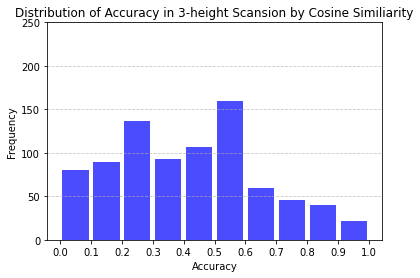

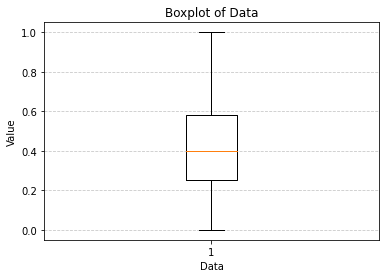

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your own list of numbers)
data = mean_performance3

# Define the range and interval for the x-axis
x_min = min(data)
x_max = max(data)
x_interval = 0.1
bins = np.arange(x_min, x_max + x_interval, x_interval)

# Create a histogram
plt.hist(data, bins=bins, color='blue', alpha=0.7, rwidth=0.85)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval))
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.ylim(0,250)
plt.title("Distribution of Accuracy in 3-height Scansion by Cosine Similiarity")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Create a boxplot
plt.boxplot(data)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Boxplot of Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [45]:
sum(mean_performance3)/len(mean_performance3)

0.4056084571690813

# 5-height

In [154]:
def determine_shape_5_height(numbers):#  len(numbers) == 5
    first_3_pitch = numbers[:3]
    shape = determine_shape(first_3_pitch)
    return shape

determine_shape_5_height([1,2,1])

'bump'

In [89]:
def first_element_label_5(numbers):
    if len(numbers) >= 5:
        numbers = numbers[:5]   
    median,maxi,mini = get_median(numbers), max(numbers),min(numbers)
    first = numbers[0]
    diff = first - median
    if first == maxi:
        return "<t4>"
    elif first == mini:
        if median == mini:
            return "<t2>"
        elif median > mini:
            return "<t3>"
        else:
            return "<t1>"
    elif diff >= 2:
        return "<t4>"
    elif -2 <  diff < 2:
        return "<t1>"
    elif -4 < diff <= -2:
        return "<t2>"
    else:
        return "<t3>"
    
    
first_element_label_5([70,72,67, 64, 67]) 

'<t4>'

In [69]:
two_note_neume([1,2,3],"<t2>")

'<t2> <t1>'

In [ ]:
def three_note(numbers3):
    first_lable = numbers3[0]
    for i in range(0,2):
        

In [178]:
# shape sequence 9 types
def level_sequence(numbers3,first_label):
    return " ".join([first_label] * 3)
        
    
def rise_sequence(numbers3,first_label):
    i,j,h = numbers3[0],numbers3[1],numbers3[2]
    if first_label == "<t4>":
        return " ".join([first_label] * 3)
    elif first_label == "<t1>":
        if numbers3[1] - numbers3[0] <= 2:
            if numbers3[2] - numbers3[1] <= 2:
                return " ".join([first_label] * 3)
            else:
                return "<t1> <t1> <t4>"
        else:
            return "<t1> <t4> <t4>"
            # print("Error! First label is <m>, so the sequence can't be rising")
    elif first_label == "<t2>":
        if numbers3[2] - numbers3[1] > 2:
            return "<t2> <t1> <t4>"
        else:
            return "<t2> <t1> <t1>"
            
    elif first_label == "<t3>":
        if numbers3[1] - numbers3[0] <= 4:
            if numbers3[2] - numbers3[1] <= 2:
                return "<t3> <t2> <t1>"
            else:
                return "<t3> <t2> <t4>"
        elif 4 < numbers3[1] - numbers3[0] <= 6:
            if numbers3[2] - numbers3[1] <= 2:
                return "<t3> <t1> <t1>"
            else:
                return "<t3> <t1> <t4>"
        else:
            return "<t3> <t4> <t4>"
    else: #<t0>
        if j - i <= 2: #<t0> <t3>
            if h - j <= 2:
                return "<t0> <t3> <t3>"
            elif 2 < h - j <= 4:
                return "<t0> <t3> <t2>"
            elif 4 < h - j <= 6:
                return "<t0> <t3> <t1>"
            else:
                return "<t0> <t3> <t4>"
        elif 2 < j - i <= 4: #<t0> <t2>
            if h - j <= 2:
                return "<t0> <t2> <t2>"
            elif 2 < h - j <= 4 :
                return "<t0> <t2> <t1>"
            else:
                return "<t0> <t2> <t4>"
        elif 4 < j - i <= 8: #<t0> <t1>
            if h - j <= 2:
                return "<t0> <t1> <t1>"
            else:
                return "<t0> <t1> <t4>"
            
            
            
    
def fall_sequence(numbers3,first_label):
    if first_label == "<t3>":
        return "<t3> <t0> <t0>"
    elif first_label == "<t0>":
        return "<t0> <t0> <t0>"
    elif first_label == "<t2>":
        if numbers3[0] - numbers3[1] <=2:
            return "<t2> <t3> <t0>"
        else:
            return "<t2> <t0> <t0>"
    elif first_label == "<t1>":
        if 6 >= numbers3[0] - numbers3[1] > 2: #<t1> <t3>
            return "<t1> <t3> <t0>"
        elif  numbers3[0] - numbers3[1] <= 2: # <t1> <t2>
            if 4 >= numbers3[1] - numbers3[2] > 2:
                return "<t1> <t2> <t3>"
            else:
                return "<t1> <t2> <t0>"
        elif numbers3[0] - numbers3[1] > 6: # <t1> <t0>
            return "<t1> <t0> <t0>"
    else:#"<t4>
        if numbers3[0] - numbers3[1] <= 2:#<t4> <t4>
            if numbers3[1] - numbers3[2] <= 2:
                return "<t4> <t4> <t4>"
            else:
                return "<t4> <t4> <t1>"
        elif 4 >= numbers3[0] - numbers3[1] >2: # <t4> <t1>
            if numbers3[1] - numbers3[2] <= 2:
                return "<t4> <t1> <t2>"
            elif 4 >= numbers3[1] - numbers3[2] > 2:
                return "<t4> <t1> <t3>"
            else:
                return "<t4> <t1> <t0>"
        elif 6 >= numbers3[0] - numbers3[1] > 4: #<t4> <t2>
                if numbers3[1] - numbers3[2] <= 2:
                    return "<t4> <t2> <t2>"
                elif 2 < numbers3[1] - numbers3[2] <= 4:
                    return "<t4> <t2> <t3>"
                else:
                    return "<t4> <t2> <t0>"
        elif 8 >= numbers3[0] - numbers3[1] > 6:#<t4> <t3>
                if numbers3[1] - numbers3[2] <= 2:
                    return "<t4> <t3> <t3>"
                else:
                    return "<t4> <t3> <t0>"
        else:
            return "<t4> <t0> <t0>"

def bump_sequence(numbers3,first_label):
    i,j,h = numbers3[0],numbers3[1],numbers3[2]
    if first_label == "<t4>":
        return " ".join([first_label] * 3)
    elif first_label == "<t1>":
        if j - i >= 2: #<t1> <t4>
            if h > i:
                return "<t1> <t4> <t1>"
            elif 4 > h - i > 2:
                return "<t1> <t4> <t2>"
            else:
                return "<t1> <t4> <t0>"
        else: #<t1> <t1>
            if numbers3[2] > numbers3[0]:
                return "<t1> <t1> <t1>"
            elif 4 > numbers3[2] -  numbers3[0] > 2:
                return "<t1> <t1> <t2>"
            else:
                return "<t1> <t1> <t0>"
    elif first_label == "<t2>":
        if 4 >=  j - i > 0 :# <t2> <t1>
            if 4 >= j - h > 0:
                return "<t2> <t1> <t2>"
            elif 6 >= j - h > 4 : 
                return "<t2> <t1> <t3>"
            else:
                return "<t2> <t1> <t0>"
        else:#<t2> <t4>
            if  j - h <= 2:
                return "<t2> <t4> <t1>"
            elif 2 < j - h <= 4:
                return "<t2> <t4> <t2>"
            elif 4 < j - h <= 8:
                return "<t2> <t4> <t3>"
            else:
                return "<t2> <t4> <t0>"
    elif first_label == "<t3>":
        if 6 > j - i >= 4:#<t3> <t1>
            if j - i > 4:
                return "<t3> <t1> <t0>"
            elif 2 < j - i <= 4:
                return "<t3> <t1> <t3>"
            else:
                return "<t3> <t1> <t2>"
        elif 0 < j - i < 4: # <t3> <t2>
            if j - h > 2:
                return "<t3> <t2> <t3>"
            else:
                return "<t3> <t2> <t0>"
        else:
            if h - j <= 2:
                return "<t3> <t3> <t0>"
    else:
        if j - i <= 2:# <t0> <t3>
            return "<t0> <t3> <0>"
        elif 2 < j - i <= 6:#<t0> <t2>
            if j - h <= 4:
                return "<t0> <t2> <t3>"
            else:
                return "<t0> <t2> <t0>"
        elif 6 < j - i <= 8: #<t0> <t1>
            if j - h <= 2:
                return "<t0> <t1> <t1>"
            elif 2 < j - h <= 4:
                return "<t0> <t1> <t2>"
            elif 4 < j - h <= 6:
                return "<t0> <t1> <t3>"
            else:
                return "<t0> <t1> <t0>"
        else: #"<t0> <t4>"
            if j - h < 2:
                return "<t0> <t4> <t4>"
            elif 2 <= j - h <= 4:
                return "<t0> <t4> <t1>"
            elif 4 < j - h <= 8:
                return "<t0> <t4> <t2>"
            elif 8 < j - h <= 12:
                return "<t0> <t4> <t3>"
            else:
                return "<t0> <t4> <t0>"
    
def slot_sequence(numbers3,first_label):
    i,j,h = numbers3[0],numbers3[1],numbers3[2]
    if first_label == "<t4>":
        if 0 < i - j <= 2:#<t4> <t1>
            if h - j >= 2:
                return "<t4> <t1> <t4>"
            else:
                return "<t4> <t1> <t1>"
        elif 2 < i - j <= 4 :#<t4> <t2>
            if 4 > h - j >= 2:
                return "<t4> <t2> <t1>"
            else:
                return "<t4> <t2> <t4>"
        elif 4 < i - j <= 8:#<t4> <t3>
            if h - j <= 4:
                return "<t4> <t3> <t2>"
            elif 4 < h - j <= 6:
                return "<t4> <t3> <t1>"
            else:
                return "<t4> <t3> <t4>"
        else:#<t4> <t0>
            if h - j <= 2:
                return "<t4> <t0> <t3>"
            elif 2 < h - j <= 6:
                return "<t4> <t0> <t2>"
            elif 6 < h - j <= 8:
                return "<t4> <t0> <t1>"
            else:
                return "<t4> <t0> <t4>"
    elif first_label == "<t1>":
        if 0 < i - j <= 2:#<t1> <t2>
            if 4 >= h - j >= 2:
                return "<t1> <t2> <t1>"
            elif h - j > 4 :
                return "<t1> <t2> <t4>"
            else:
                return "<t1> <t2> <t2>"
        elif 2 < i - j <= 6 :#<t1> <t3>
            if 4 > h - j >= 0:
                return "<t1> <t3> <t2>"
            elif 6 > h - j >= 4:
                return "<t1> <t3> <t1>"
            else:
                return "<t1> <t3> <t4>"
        else:#<t1> <t0>
            if h - j <=2:
                return "<t1> <t0> <t3>"
            elif 2 < h - j <= 6:
                return "<t1> <t0> <t2>"
            elif 6 < h - j <= 8:
                return "<t1> <t0> <t1>"
            else:
                return "<t1> <t0> <t4>"
            
    elif first_label == "<t2>":
        if i - j <= 4:#<t2> <t3>
            if h - j <= 4:
                return "<t2> <t3> <t2>"
            elif 4 < h - j <= 6:
                return "<t2> <t3> <t1>"
            else:
                return "<t2> <t3> <t4>"
        else: #<t2> <t0>
            if h - j <= 2:
                return "<t2> <t0> <t3>"
            elif 2 < h - j <= 6:
                return "<t2> <t0> <t2>"
            elif 6 < h - j <= 8:
                return "<t2> <t0> <t1>"
            else:
                return "<t2> <t0> <t4>"
    elif first_label == "<t3>":
        if i - j >= 2:
            if h - j <= 4:
                return "<t3> <t3> <t2>"
            elif 4< h - j <= 6:
                return "<t3> <t3> <t1>"
            else:
                return "<t3> <t3> <t4>"
        else:#<t3> <t0>
            if h - j <= 2:
                return "<t3> <t0> <t3>"
            elif 2 < h - j <= 4:
                return "<t3> <t0> <t2>"
            elif 4 < h - j <= 6:
                return "<t3> <t0> <t1>"
            else:
                return "<t3> <t0> <t4>"
    else:
        if h - j <= 2:
            return "<t0> <t0> <t3>"
        elif 2 < h - j <= 6:
            return "<t0> <t0> <t2>"
        elif 6 < h - j <= 8:
            return "<t0> <t0> <t1>"
        else:
            return "<t0> <t0> <t4>"

def level_fall_sequence(numbers3,first_label):
    i,j,h = numbers3[0],numbers3[1],numbers3[2]
    if first_label == "<t4>":#<t4> <t4>
        if j - h <= 2:
            return "<t4> <t4> <t1>"
        elif 2 < j - h <= 4: 
            return "<t4> <t4> <t2>"
        elif 4 < j - h <= 6:
            return "<t4> <t4> <t3>"
        else:
            return "<t4> <t4> <t0>"
    elif first_label == "<t1>":#<t1> <t1>
        if j - h <= 4:
            return "<t1> <t1> <t2>"
        elif 4 < j - h <= 8: 
            return "<t1> <t1> <t3>"
        else:
            return "<t1> <t1> <t0>"
    elif first_label == "<t2>":
        if j - h <= 4:
            return "<t2> <t2> <t3>"
        else:
            return "<t2> <t2> <t0>"
    elif first_label == "<t3>":
        return "<t3> <t3> <t0>"
    else:
        return "<t0> <t0> <t0>"

def level_rise_sequence(numbers3,first_label):
    i,j,h = numbers3[0],numbers3[1],numbers3[2]
    if first_label == "<t4>":#<t4> <t4>
        return "<t4> <t4> <tt4>"
    elif first_label == "<t1>":#<t1> <t1>
        if h - j <= 2:
            return "<t1> <t1> <t1>"
        else:
            return "<t1> <t1> <t4>"
    elif first_label == "<t2>":
        if h - j <= 4:
            return "<t2> <t2> <t3>"
        else:
            return "<t2> <t2> <t0>"
    elif first_label == "<t3>":
        return "<t3> <t3> <t0>"
    else:
        if h - j <= 2:
            return "<t0> <t0> <t3>"
        elif 2 < h - j <= 6:
            return "<t0> <t0> <t2>"
        elif 6 < h - j <= 8:
            return "<t0> <t0> <t1>"
        else:
            return "<t0> <t0> <t4>"

def fall_level_sequence(numbers3,first_label):
    i,j,h = numbers3[0],numbers3[1],numbers3[2]
    if first_label == "<t4>":
        if i - j <= 2:
            return "<t4> <t4> <t4>"
        elif 2 < i - j <= 4:
            return "<t4> <t1> <t1>"
        elif 4 < i - j <= 6:
            return "<t4> <t2> <t2>"
        elif 4 < i - j <= 8:
            return "<t4> <t3> <t3>"
        else:
            return "<t4> <t0> <t0>"
    elif first_label == "<t1>":
        if i - j <= 2:
            return "<t1> <t1> <t1>"
        elif 2 < i - j <= 4:
            return "<t1> <t2> <t2>"
        elif 4 < i - j <= 8:
            return "<t1> <t3> <t3>"
        else:
            return "<t1> <t0> <t0>"
    elif first_label == "<t2>":
        if i - j <= 4:
            return "<t2> <t3> <t3>"
        else:
            return "<t2> <t0> <t0>"
    elif first_label == "<t3>":
        if i - j <= 2:
            return "<t3> <t3> <t0>"
        else:
            return "<t3> <t0> <t0>"
    else:#<l>
        # print("Error! First label is <l> and fall_level, contradiction!")
        pass

def rise_level_sequence(numbers3,first_label):
    i,j,h = numbers3[0],numbers3[1],numbers3[2]
    if first_label == "<t4>":
        return "<t4> <t4> <t4>"
    elif first_label == "<t1>":
        if j - i <= 2:
            return "<t1> <t1> <t1>"
        else:
            return "<t1> <t4> <t4>"
    elif first_label == "<t2>":
        if j - i <= 2:
            return "<t2> <t2> <t2>"
        elif 2 < j - i <= 4:
            return "<t2> <t1> <t1>"
        else:
            return "<t2> <t4> <t4>" 
    elif first_label == "<t3>":
        if j - i <= 4:
            return "<t3> <t2> <t2>"
        elif 4 < j - i <= 8:
            return "<t3> <t1> <t1>"
        else:
            return "<t3> <t4> <t4>"
    else:#<t0>
        if j - i <= 2:
            return "<t0> <t3> <t3>"
        elif 2 < j - i <= 6:
            return "<t0> <t2> <t2>"
        elif 6 < j - i <= 8:
            return "<t0> <t1> <t1>"
        else:
            return "<t0> <t4> <t4>"




In [113]:
bump_sequence([12,13,4],"<t2>")

'<t2> <t1> <t0>'

In [147]:
pitch_seqs = [[67, 62, 64, 71, 67, 64, 67],[9,2,3,12],[4,3,6]]

def shape_function(shape,given_pitch):
#     print(shape)
    try:
        if len(given_pitch) >= 3:
            label_1st = first_element_label_5(given_pitch)
            mapping = {"rise":rise_sequence(given_pitch,label_1st),
                        "level":level_sequence(given_pitch,label_1st),
                        "fall":fall_sequence(given_pitch,label_1st),
                        "bump":bump_sequence(given_pitch,label_1st),
                        "slot":slot_sequence(given_pitch,label_1st),
                        "level_rise":level_rise_sequence(given_pitch,label_1st),
                        "level_fall":level_fall_sequence(given_pitch,label_1st),
                        "rise_level":rise_level_sequence(given_pitch,label_1st),
                        "fall_level":fall_level_sequence(given_pitch,label_1st)
                          }
            return mapping[shape].split()
    except AttributeError:
        print("Shape Function Error:", shape, given_pitch,label_1st)
        

for pitch_seq in pitch_seqs:
    res = shape_function(determine_shape_5_height(pitch_seq),pitch_seq)
    print(res)

['<t1>', '<t3>', '<t2>']
['<t4>', '<t3>', '<t2>']
['<t1>', '<t2>', '<t1>']


In [171]:
print(bump_sequence([9, 4, 2, 4, 2, 0, 0],"<t3>"))

<t3> <t3> <t0>


In [148]:
def from_four(triplet_1st,new_three):# for the 4th element (new triplet)
    shape = determine_shape_5_height(new_three)
    last_label = triplet_1st[-1]
#     print("The shape of the new_three elements:",shape)
    #1
    if shape == "rise":
        if last_label == "<t4>": # new_three[1]是之前triplet的最后一个元素
            return "<t4>"
        elif last_label == "<t1>":
            if new_three[-1] - new_three[1] > 2:
                return "<t4>"
            else:
                return "<t1>"
        elif last_label == "<t2>":
            if new_three[-1] - new_three[1] <=2 :
                return "<t2>"
            elif 2 < new_three[-1] - new_three[1] <= 4:
                return "<t1>"
            else:
                return "<t4>"
        elif last_label == "<t3>":
            if new_three[-1] - new_three[1] <= 2 :
                return "<t3>"
            elif 2 < new_three[-1] - new_three[1] <= 4 :
                return "<t2>"
            elif 4 < new_three[-1] - new_three[1] <= 6:
                return "<t1>"
            else:
                return "<t4>"
            
        else:#<t0>
            if new_three[-1] - new_three[1] <= 2:
                return "<t3>"
            elif 2 < new_three[-1] - new_three[1] <= 6:
                return "<t2>"
            elif 6 < new_three[-1] - new_three[1] <= 8:
                return "<t1>"
            else:
                return "<t4>"
    #2
    elif shape == "fall":
#         print("NEW SHAPE: FALL","上次结尾：",triplet_1st[1])
        if last_label == "<t4>": #上次结尾
            if new_three[1] - new_three[-1] <= 2:
                return "<t4>"
            elif 2 < new_three[-1] - new_three[1] <= 4:
                return "<t1>"
            elif 4 < new_three[1] - new_three[-1] <= 8:
                return "<t2>"
            elif 8 < new_three[-1] - new_three[1] <= 10:
                return "<t3>"
            else:
                return "<t0>"
        elif last_label == "<t1>":
            if new_three[1] - new_three[-1] >= 2:
                return "<t1>"
            elif 2 < new_three[1] - new_three[-1] <= 4:
                return "<t2>"
            elif 4 < new_three[1] - new_three[-1] <= 6:
                return "<t3>"
            else:
                return "<t0>"
        elif last_label == "<t2>":
            if new_three[1] - new_three[-1] <= 2:
                return "<t2>"
            elif 2 < new_three[1] - new_three[-1] <= 4:
                return "<t3>"
            else:
                return "<t0>"
        else:#<l>
            return "<t0>"  
    #3
    elif shape == "level":
        return last_label
    #4
    elif shape == "rise_level":
        return last_label
    #5
    elif shape == "fall_level":
        return last_label
    #6
    elif shape == "level_rise":
        if last_label == "<t4>":
            return "<t4>"#比high更高的只有high
        elif last_label == "<t1>":
            if new_three[-1] - new_three[1] >= 2:
                return "<t4>"
            else:
                return "<t1>"
        elif last_label == "<t2>": #<m> <m>的话不存在<m> <m> <h>,但现在没有考虑word boundnary
            if new_three[-1] - new_three[1] <= 2:
                return "<t2>"
            elif 2 < new_three[-1] - new_three[1] <= 4:
                return "<t1>"
            else:
                return "<t4>"
        elif last_label == "<t3>":
            if new_three[-1] - new_three[1] <= 4:
                return "<t2>"
            elif 4 < new_three[-1] - new_three[1] <= 6:
                return "<t1>"
            else:
                return "<t4>"
        else:#<t0>
            if new_three[-1] - new_three[1] <= 2:
                return "<t3>"
            elif 2 < new_three[-1] - new_three[1] <= 6:
                return "<t2>"
            elif 6 < new_three[-1] - new_three[1] <= 8:
                return "<t1>"
            else:
                return "<t4>"
    #7 
    elif shape == "level_fall":
        if last_label == "<t4>":
            if new_three[1] - new_three[-1] <=  2:
                return "<t4>"
            elif  2 < new_three[1] - new_three[-1] <= 4:
                return "<t1>"
            elif 4 < new_three[1] - new_three[-1] <= 8:
                return "<t2>"
            elif 8 < new_three[1] - new_three[-1] <= 10:
                return "<t3>"
            else:
                return "<t0>"
        elif last_label == "<t1>":
            if new_three[1] - new_three[-1] <=  2:
                return "<t1>"
            elif  2 < new_three[1] - new_three[-1] <= 4:
                return "<t2>"
            elif 4 < new_three[1] - new_three[-1] <= 8:
                return "<t3>"
            else:
                return "<t0>"            
            return "<l>"
        elif last_label == "<t2>":
            if new_three[1] - new_three[-1] <=  2:
                return "<t2>"
            elif 2 < new_three[1] - new_three[-1] <= 6:
                return "<t3>"
            else:
                return "<t0>"
        elif last_label == "<t3>":
            if new_three[1] - new_three[-1] <=  2:
                return "<t3>"
            else:
                return "<t0>"
        else:#<t0>
            return "<t0>"
    #8
    elif shape == "bump":
        if last_label == "<t4>":
            if 4 < new_three[1] - new_three[-1] <=6 :
                return "<t2>"
            elif new_three[1] - new_three[-1] <= 2:
                return "<t4>"
            elif 2 < new_three[1] - new_three[-1] <= 4:
                return "<t1>"
            elif 6 < new_three[1] - new_three[-1] <= 8:
                return "<t3>"
            else:
                return "<t0>"
        elif last_label == "<t1>":
            if new_three[1] - new_three[-1] <= 2:
                return "<t1>"
            elif 2 < new_three[1] - new_three[-1] <= 4:
                return "<t2>"
            elif 4 < new_three[1] - new_three[-1] <= 6:
                return "<t3>"
            else:
                return "<t0>"
        elif last_label == "<t2>":
            if new_three[1] - new_three[-1] <= 2:
                return "<t2>"
            elif 2 < new_three[1] - new_three[-1] <= 4:
                return "<t3>"
            else:
                return "<t0>"
        elif last_label == "<t3>":
            if new_three[1] - new_three[-1] <= 2:
                return "<t3>"
            else:
                return "<t0>"
        else:#<l>:
            return "<t0>"
    # 9
    elif shape == "slot":
        if last_label == "<t4>":
            return "<t4>"
        elif last_label == "<t1>":
            if new_three[-1] - new_three[1] <= 2:
                return "<t1>"
            else:
                return "<t4>"
        elif last_label == "<t2>":
            if new_three[-1] - new_three[1] <= 2:
                return "<t2>"
            elif 2 < new_three[-1] - new_three[1] <= 4:
                return "<t1>"
            else:
                return "<t4>"
        elif last_label == "<t3>":
            if new_three[-1] - new_three[1] <= 2:
                return "<t3>"
            elif 2 < new_three[-1] - new_three[1] <= 4:
                return "<t2>"
            elif 4 < new_three[-1] - new_three[1] <= 6:
                return "<t1>"
            else:
                return "<t4>"
        else:#<l>
            if new_three[-1] - new_three[1] <= 2:
                return "<t3>"
            elif 2 < new_three[-1] - new_three[1] <= 6:
                return "<t2>"
            elif 6 < new_three[-1] - new_three[1] <= 8:
                return "<t1>"
            elif 8 < new_three[-1] - new_three[1]:
                return "<t4>"
            else:
                return "<t0>"
                

In [149]:
ab_pitch = [[60, 62, 64, 71, 67, 64, 67],
 [60, 62, 64, 71, 67, 71, 72],
 [60, 62, 64, 71, 67, 64, 67, 60],
 [60, 62, 62, 59, 60]]

for pitch_seq in ab_pitch:
    convert_label_3 = shape_function(determine_shape(pitch_seq),pitch_seq)
    labels = convert_label_3

    for i in range(1,len(pitch_seq)-2):
        print("Given new triplet:",pitch_seq[i:i+3])
        print(from_four(convert_label_3,pitch_seq[i:i+3]))
        labels.append(from_four(convert_label_3,pitch_seq[i:i+3]))
        convert_label_3 = labels[-3:]
        print("Saved labels:",convert_label_3)
        print("_________")
        
    print(pitch_seq)
    print(labels)
    print("------------------")


Given new triplet: [62, 64, 71]
<t4>
Saved labels: ['<t2>', '<t1>', '<t4>']
_________
Given new triplet: [64, 71, 67]
<t1>
Saved labels: ['<t1>', '<t4>', '<t1>']
_________
Given new triplet: [71, 67, 64]
<t1>
Saved labels: ['<t4>', '<t1>', '<t1>']
_________
Given new triplet: [67, 64, 67]
<t4>
Saved labels: ['<t1>', '<t1>', '<t4>']
_________
[60, 62, 64, 71, 67, 64, 67]
['<t3>', '<t2>', '<t1>', '<t4>', '<t1>', '<t1>', '<t4>']
------------------
Given new triplet: [62, 64, 71]
<t4>
Saved labels: ['<t2>', '<t1>', '<t4>']
_________
Given new triplet: [64, 71, 67]
<t1>
Saved labels: ['<t1>', '<t4>', '<t1>']
_________
Given new triplet: [71, 67, 71]
<t4>
Saved labels: ['<t4>', '<t1>', '<t4>']
_________
Given new triplet: [67, 71, 72]
<t4>
Saved labels: ['<t1>', '<t4>', '<t4>']
_________
[60, 62, 64, 71, 67, 71, 72]
['<t3>', '<t2>', '<t1>', '<t4>', '<t1>', '<t4>', '<t4>']
------------------
Given new triplet: [62, 64, 71]
<t4>
Saved labels: ['<t2>', '<t1>', '<t4>']
_________
Given new triple

In [135]:
# mapping
symbol2num = {"<l>":"0","<m>":"3","<h>":"5"}

#preprocess: filter out lines starting with '<t0>'

with open("./5_height_scansion_from_cantonese_songs.txt","r") as fin:
    five_height = [line.strip() for line in fin.readlines()]
    
with open("./3_height_scansion_from_cantonese_songs.txt","r") as fin:
    three_height = [line.strip() for line in fin.readlines()]   


print(len(five_height),len(three_height))

processed_melody = list()
processed_scansion = list()

for idx in range(1,len(five_height[1:])+1):
    sent = five_height[idx]
    sent = sent.split("\t")
    melody,scansion = sent[0].split(),sent[1]
    print(scansion)
    if scansion.split()[0] != "<t0>":
        scansion_five = scansion.split()
        melody_symbols = list()
        for m in melody:
            melody_symbols.append(int(m))
        processed_melody.append(melody_symbols)
        processed_scansion.append(scansion_five)

print(len(processed_scansion) == len(processed_melody))

print(len(processed_melody))

test_melody = processed_melody[round(len(processed_melody)*0.9):]
test_scansion = processed_scansion[round(len(processed_scansion)*0.9):]




11500 11500
<t3> <t3> <t2> <t3> <t1> <t2> <t4> <t4> <t0>
<t2> <t2> <t1> <t2> <t4> <t2> <t4> <t1> <t3>
<t3> <t4> <t3> <t3> <t0> <t3> <t2> <t2> <t4>
<t4> <t1> <t2> <t2>
<t4> <t4> <t4> <t4> <t1> <t2> <t4>
<t0> <t3> <t4> <t4> <t2> <t3> <t2>
<t2> <t4> <t0> <t2> <t4> <t4>
<t2> <t2> <t3> <t2> <t2> <t4> <t0> <t0> <t3>
<t3> <t4> <t4> <t3> <t0> <t1> <t2>
<t0> <t3> <t2> <t1> <t2>
<t3> <t3> <t2> <t3> <t4> <t2> <t4> <t4> <t0>
<t2> <t3> <t2> <t2> <t1> <t2> <t2> <t4> <t3>
<t3> <t4> <t4> <t3> <t0> <t2> <t2> <t2> <t1> <t4> <t4> <t2> <t2>
<t2> <t4> <t4> <t4> <t2> <t4>
<t2> <t2> <t4> <t3> <t3>
<t0> <t2> <t2> <t4> <t3> <t4> <t4> <t1> <t2>
<t0> <t3> <t4> <t4> <t2> <t3> <t2>
<t2> <t4> <t0> <t2> <t4> <t4> <t2>
<t3> <t3> <t3> <t2> <t4> <t0> <t0> <t3>
<t3> <t2> <t4> <t4> <t3> <t0> <t4> <t2>
<t0> <t3> <t2> <t1> <t2>
<t4> <t3> <t4> <t0> <t4> <t4> <t2>
<t2> <t3> <t0> <t3> <t2> <t3> <t2> <t4> <t1>
<t4> <t3> <t4> <t3> <t4> <t1> <t2>
<t3> <t3> <t0> <t3> <t2> <t3> <t2> <t4> <t2>
<t4> <t3> <t4> <t2> <t4> <t4> <t2>
<t2

<t2> <t3> <t2>
<t4> <t3> <t4>
<t4> <t4> <t2> <t0> <t4> <t1> <t2>
<t2> <t3> <t2>
<t4> <t3> <t4>
<t4> <t4> <t2> <t0> <t4> <t3> <t2>
<t2> <t3> <t2>
<t1> <t3> <t4>
<t4> <t2> <t2> <t0> <t4> <t4> <t2>
<t2> <t3> <t2>
<t4> <t3> <t4>
<t1> <t4> <t2> <t0> <t4> <t3> <t2>
<t2> <t3> <t2>
<t4> <t3> <t4>
<t4> <t4> <t2> <t0> <t4> <t1> <t2>
<t2> <t0> <t3> <t2> <t4> <t0> <t3>
<t0> <t0> <t3> <t2> <t4> <t0> <t3>
<t4> <t4> <t2>
<t3> <t3> <t2> <t2> <t3> <t3>
<t0> <t0> <t3> <t2> <t4> <t0> <t3>
<t0> <t0> <t4> <t3>
<t0> <t0> <t4> <t2>
<t0> <t3> <t2> <t3> <t1> <t2> <t0>
<t0> <t0> <t3> <t4> <t4> <t2> <t1> <t2>
<t0> <t3> <t3> <t2> <t2> <t4> <t3> <t2>
<t4> <t4> <t2>
<t0> <t3> <t2> <t4> <t0> <t3>
<t0> <t0> <t3> <t2> <t4> <t3> <t3>
<t0> <t0> <t4> <t2>
<t0> <t0> <t4> <t2>
<t0> <t3> <t2> <t3> <t1> <t3> <t0>
<t0> <t0> <t3> <t2> <t4> <t4> <t4> <t2>
<t2> <t4> <t3> <t3>
<t0> <t2> <t3> <t3> <t0> <t2> <t2>
<t2> <t2> <t1> <t4> <t2> <t4>
<t1> <t0> <t2> <t2> <t2> <t3>
<t0> <t3> <t3> <t3> <t2> <t4> <t2>
<t2> <t2> <t1> <t4> <t2> 

<t2> <t2> <t0> <t3> <t2> <t1> <t1>
<t2> <t2> <t3> <t2> <t2> <t4> <t2>
<t3> <t3> <t2> <t4> <t2>
<t0> <t0> <t3> <t2> <t3>
<t3> <t4> <t4> <t3> <t4> <t4> <t2>
<t2> <t2> <t0> <t3> <t2> <t1> <t3> <t1> <t1> <t1> <t0> <t4> <t2>
<t4> <t4> <t2> <t3>
<t0> <t0> <t0> <t0> <t0> <t3> <t2> <t2> <t3>
<t0> <t3> <t3> <t2> <t4> <t2>
<t0> <t2> <t3> <t2> <t3> <t4> <t1> <t2> <t3>
<t0> <t4> <t4> <t2> <t4> <t2> <t4> <t4> <t2> <t3>
<t2> <t2> <t2> <t4> <t2> <t4> <t4> <t2> <t2>
<t2> <t4> <t4> <t4> <t3> <t2>
<t0> <t0> <t2> <t3> <t2> <t3> <t2> <t2> <t2> <t1>
<t4> <t2> <t3> <t0> <t3> <t0> <t3> <t4> <t1>
<t3> <t3> <t4> <t4> <t2> <t3> <t3>
<t0> <t0> <t2> <t4> <t1> <t3> <t2> <t4> <t1> <t2>
<t0> <t0> <t3> <t2> <t3>
<t3> <t4> <t1> <t4> <t2> <t4> <t2>
<t3> <t3> <t2> <t4> <t2>
<t1> <t4> <t2> <t2> <t2> <t4> <t0> <t3>
<t3> <t2> <t3>
<t4> <t1> <t2> <t4> <t2> <t0> <t0> <t2> <t1> <t1>
<t0> <t0> <t3> <t2> <t3>
<t3> <t4> <t1> <t4> <t2> <t4> <t2>
<t2> <t2> <t0> <t3> <t2> <t1> <t1>
<t2> <t2> <t3> <t2> <t2> <t4> <t2>
<t3> <t3> <t1> 

<t2> <t4> <t4> <t4> <t4> <t2> <t2>
<t4> <t2> <t3> <t4> <t2>
<t2> <t3> <t0> <t0> <t2> <t1> <t2>
<t4> <t4> <t4> <t1> <t4> <t2> <t2>
<t3> <t1> <t4> <t4> <t2> <t1>
<t0> <t2> <t2> <t2> <t3>
<t0> <t1> <t0> <t4>
<t0> <t4> <t4> <t2> <t2> <t2>
<t0> <t2> <t0> <t2>
<t3> <t2> <t2> <t0> <t3> <t2>
<t4> <t3> <t2> <t0> <t0> <t2>
<t4> <t3> <t2> <t4> <t1> <t4> <t2>
<t0> <t0> <t4> <t4> <t2>
<t2> <t1> <t4> <t4> <t3> <t2>
<t3> <t3> <t2> <t3> <t3> <t0> <t4>
<t3> <t4> <t4> <t2> <t4> <t4> <t0> <t0>
<t1> <t2> <t2> <t3> <t0>
<t3> <t3> <t2> <t0> <t0> <t4> <t4> <t2>
<t2> <t4> <t1> <t4> <t2> <t4> <t1> <t2>
<t2> <t4> <t1> <t2> <t2> <t1> <t2> <t4> <t3> <t0>
<t3> <t1> <t4> <t4> <t1> <t2> <t2>
<t4> <t2> <t3> <t1> <t2>
<t2> <t2> <t0> <t3> <t4> <t3> <t2>
<t4> <t4> <t4> <t4> <t1> <t2> <t2>
<t3> <t1> <t2> <t1> <t2> <t4>
<t0> <t3> <t2> <t2> <t3>
<t0> <t1> <t0> <t4>
<t0> <t4> <t1> <t2> <t3> <t0>
<t0> <t2> <t0> <t2>
<t0> <t2> <t2> <t0> <t3> <t3>
<t1> <t3> <t2> <t0> <t0> <t2>
<t2> <t3> <t2> <t2> <t2> <t3> <t0>
<t0> <t0> <t2> 

<t0> <t0> <t0> <t4> <t4> <t2> <t1>
<t0> <t0> <t4> <t4> <t2> <t1>
<t1> <t1> <t2> <t0> <t2> <t3> <t2> <t2> <t2> <t3> <t0> <t2> <t2>
<t0> <t0> <t2> <t2> <t2> <t4> <t4> <t4> <t2> <t2> <t2> <t4> <t2> <t4>
<t1> <t4> <t1> <t0> <t2> <t2> <t2> <t2> <t4> <t4> <t2> <t3> <t0> <t3> <t2>
<t0> <t2> <t2> <t2> <t4> <t4> <t1> <t2> <t2> <t4> <t1> <t2> <t4>
<t0> <t3> <t2> <t4> <t4> <t3> <t4>
<t0> <t3> <t3> <t1> <t2> <t4> <t1> <t2> <t0> <t3>
<t1> <t2> <t2> <t4> <t4> <t3> <t1> <t2>
<t2> <t3> <t0> <t3> <t2> <t1> <t3> <t4>
<t2> <t4> <t4> <t4> <t1> <t3> <t1> <t4> <t2>
<t3> <t0> <t0> <t3> <t2> <t4> <t2> <t0> <t2> <t2> <t4> <t1>
<t2> <t3> <t3> <t0> <t0> <t2> <t3>
<t0> <t4> <t2> <t2> <t3> <t2> <t3> <t0> <t0> <t0> <t4>
<t2> <t3> <t2> <t3> <t3> <t2> <t0>
<t3> <t0> <t0> <t3> <t2> <t1> <t2> <t0> <t2> <t3> <t2> <t4> <t2>
<t2> <t3> <t3> <t0> <t2> <t1> <t3>
<t0> <t4> <t2> <t2> <t3> <t2> <t3> <t3> <t0> <t0> <t3>
<t0> <t0> <t0> <t3> <t2> <t3> <t0> <t3> <t2> <t3>
<t0> <t4> <t3> <t1> <t4> <t1> <t3> <t2> <t0> <t3> <t2> <t1>


<t0> <t3> <t2> <t4> <t3> <t2> <t4>
<t0> <t3> <t2> <t0> <t0> <t2> <t2>
<t0> <t3> <t2> <t0> <t0> <t1> <t1>
<t2> <t2> <t2> <t4> <t4>
<t2> <t2> <t2> <t3> <t0>
<t0> <t0> <t3> <t2> <t2> <t2> <t3> <t2>
<t3> <t3> <t2> <t2> <t4> <t4>
<t2> <t2> <t4> <t4> <t0>
<t4> <t2> <t2> <t1> <t2>
<t1> <t4>
<t3> <t4> <t4> <t2> <t1> <t4> <t2> <t4> <t1>
<t0> <t3> <t2> <t2> <t2> <t4> <t1>
<t2> <t3> <t2> <t2> <t2>
<t4> <t3>
<t3> <t4> <t4> <t4> <t1> <t4> <t2> <t4> <t1>
<t0> <t3> <t2> <t2> <t2> <t4> <t4>
<t2> <t3> <t2> <t2> <t2>
<t2> <t3> <t0> <t2> <t1>
<t0> <t2> <t2>
<t3> <t1> <t4> <t2> <t1>
<t3> <t4> <t4> <t2> <t2> <t3> <t4>
<t3> <t2> <t3>
<t2> <t2> <t2> <t3> <t1> <t2> <t2> <t3> <t4>
<t0> <t1> <t2> <t2> <t3> <t4>
<t3> <t1> <t2> <t2> <t3>
<t2> <t3> <t2> <t3> <t0> <t3> <t2>
<t3> <t4> <t2> <t2> <t3> <t4> <t2> <t2> <t3> <t4>
<t3> <t4> <t2> <t2> <t3> <t2>
<t2> <t1> <t2> <t4> <t2>
<t2> <t2> <t1> <t1>
<t2> <t3> <t2> <t3>
<t0> <t3> <t3> <t3> <t3> <t2>
<t3> <t0> <t3> <t3>
<t3> <t3> <t4> <t1> <t3> <t2>
<t4> <t3>
<t3> <t2> 

In [136]:
test_scansion

[['<t4>', '<t4>', '<t2>', '<t4>', '<t4>', '<t2>', '<t2>'],
 ['<t1>', '<t4>', '<t2>', '<t3>', '<t3>'],
 ['<t4>', '<t4>', '<t2>', '<t2>', '<t2>'],
 ['<t3>',
  '<t2>',
  '<t2>',
  '<t2>',
  '<t3>',
  '<t3>',
  '<t2>',
  '<t1>',
  '<t4>',
  '<t0>'],
 ['<t2>',
  '<t2>',
  '<t2>',
  '<t3>',
  '<t1>',
  '<t1>',
  '<t1>',
  '<t2>',
  '<t3>',
  '<t2>'],
 ['<t3>', '<t3>', '<t2>', '<t2>'],
 ['<t3>', '<t3>', '<t2>', '<t3>'],
 ['<t1>', '<t4>', '<t2>', '<t3>', '<t3>'],
 ['<t4>', '<t2>', '<t2>', '<t4>', '<t2>'],
 ['<t2>', '<t3>', '<t0>', '<t4>', '<t3>', '<t3>'],
 ['<t3>',
  '<t2>',
  '<t2>',
  '<t2>',
  '<t2>',
  '<t3>',
  '<t2>',
  '<t4>',
  '<t2>',
  '<t0>'],
 ['<t2>',
  '<t2>',
  '<t2>',
  '<t3>',
  '<t4>',
  '<t2>',
  '<t4>',
  '<t2>',
  '<t2>',
  '<t2>'],
 ['<t3>', '<t3>', '<t2>', '<t1>'],
 ['<t3>', '<t3>', '<t2>', '<t3>'],
 ['<t4>',
  '<t0>',
  '<t3>',
  '<t3>',
  '<t2>',
  '<t4>',
  '<t0>',
  '<t0>',
  '<t3>',
  '<t4>'],
 ['<t2>',
  '<t2>',
  '<t2>',
  '<t2>',
  '<t2>',
  '<t3>',
  '<t0>',
  '

In [205]:
def two_note_neume(numbers2,first_label):
    i,j = numbers2[0],numbers2[1]
    if first_label == "<t4>":
        if i == j:
            return "<t4> <t4>".split()
        elif j > i:
            return "<t4> <t4>".split()
        elif 0 > i - j >= 2:
            return "<t4> <t1>".split()
        elif 2 < i - j <= 4:
            return "<t4> <t2>".split()
        elif 4 < i - j < 6:
            return "<t4> <t3>".split()
        else:
            return "<t4> <t0>".split()
    elif first_label == "<t1>":
        if  0 <= j - i <= 2:
            return "<t1> <t1>".split()
        elif j - i > 2:
            return "<t1> <t4>".split()
        elif 6 > i - j >= 4:
            return "<t1> <2>".split()
        elif 8 > i - j >= 6:
            return "<t1> <t3>".split()
        else:
            return "<t1> <t0>".split()
            
    elif first_label == "<t2>":
        if i == j:
            return "<t2> <t2>".split()
        elif 2 >= j - i > 0:
            return "<t2> <t1>".split()
        elif j - i > 2:
            return "<t2> <t4>".split()
        elif  4 <= i - j < 0:
            return "<t2> <t3>".split()
        else:
            return "<t2> <t0>".split()
    elif first_label == "<t3>":
        if i == j:
            return "<t3> <t3>".split()
        elif 4 >= j - i > 0:
            return "<t3> <t2>".split()
        elif 6 >= j - i > 4:
            return "<t3> <t1>".split()
        elif j - i > 6:
            return "<t3> <t4>".split()
        else:
            return "<t3> <t0>".split()
    else:
        return first_label + " " + first_label

In [206]:
def icomposer_5_height(pitch_seqs):
    if len(pitch_seqs) >= 3:
        convert_first_5_labels = shape_function(determine_shape_5_height(pitch_seqs),pitch_seqs)
#         print(convert_first_5_labels,"shape")
        labels_5_height = convert_first_5_labels

        for i in range(1,len(pitch_seqs)-2):
            labels_5_height.append(from_four(convert_first_5_labels,pitch_seqs[i:i+3]))
            convert_first_5_labels = labels_5_height[-3:]
        return labels_5_height
    elif len(pitch_seqs) == 1:
        return ["<t1>"]
    else:
        diff = pitch_seqs[0] - pitch_seqs[1]
        if  diff > 8:
            return two_note_neume(pitch_seqs,"<t0>")
        elif 6 < diff <= 8:
            return two_note_neume(pitch_seqs,"<t3>")
        elif -2 <= diff <= 2:
            return two_note_neume(pitch_seqs,"<t2>")
        elif -4 < diff < -2:
            return two_note_neume(pitch_seqs,"<t1>")
        else:
            return ["<t1>","<t4>"]

In [151]:
test_melody

[[9, 4, 2, 4, 2, 0, 0],
 [7, 5, 3, 0, 0],
 [5, 4, 2, 0, 0],
 [2, 5, 5, 5, 4, 2, 7, 9, 9, 0],
 [1, 3, 5, 7, 8, 7, 7, 3, 0, 3],
 [0, 0, 1, 3],
 [0, 0, 1, 0],
 [7, 5, 3, 0, 0],
 [5, 4, 2, 4, 0],
 [3, 2, 0, 7, 2, 2],
 [2, 5, 5, 5, 4, 2, 7, 9, 9, 0],
 [1, 3, 5, 7, 8, 7, 7, 3, 0, 3],
 [0, 0, 1, 3],
 [0, 0, 1, 0],
 [0, 2, 4, 4, 5, 7, 5, 7, 9, 12],
 [3, 3, 3, 3, 2, 0, 0, 2, 3, 3, 2, 0],
 [9, 4, 4, 4, 2, 0, 0, 2, 4, 4],
 [3, 3, 3, 3, 1, 0, 0, 1, 3, 3, 5, 6],
 [3, 3, 3, 3, 1, 0, 1, 3],
 [3, 3, 3, 3, 2, 0, 0, 2, 3, 3, 2, 0],
 [9, 4, 4, 4, 2, 0, 0, 2, 4, 4],
 [0, 0, 0, 0, 2, 3, 2],
 [2, 3, 2, 0],
 [7, 5, 3, 0, 0],
 [7, 5, 3, 0, 0],
 [0, 2, 4, 5, 7, 4, 2, 4, 5, 2, 0, 4, 9, 11, 7],
 [9, 12, 10, 9, 7, 10, 9, 7, 5, 0, 2, 5, 7, 5, 5],
 [9, 12, 10, 9, 7, 10, 9, 7, 5, 0, 2, 5, 5, 4, 5],
 [4, 4, 4, 4, 4, 0, 2, 2, 2, 4, 2],
 [1, 1, 1, 1, 1, 3, 5, 0, 0, 1, 0],
 [2, 9, 9, 9, 7, 0, 5, 5, 2, 5],
 [0, 2, 4, 2, 2, 0, 2],
 [4, 4, 5, 4, 4, 0, 2, 7],
 [3, 3, 3, 3, 3, 0, 2, 7],
 [0, 0, 2, 4, 4, 6, 7, 7, 9, 7],
 [3, 

In [159]:
def first_element_label_5(numbers):
    if len(numbers) >= 5:
        numbers = numbers[:5]   
    median,maxi,mini = get_median(numbers), max(numbers),min(numbers)
    first = numbers[0]
    diff = first - median
    if first == maxi:
        return "<t4>"
    elif first == mini:
        if median == mini:
            return "<t2>"
        elif median > mini:
            return "<t3>"
        else:
            return "<t1>"
    elif diff >= 2:
        return "<t4>"
    elif -2 <  diff < 2:
        return "<t1>"
    elif -4 < diff <= -2:
        return "<t2>"
    else:
        return "<t3>"
    
    
first_element_label_5(test_melody[0]) 

'<t4>'

In [191]:
output_5_height = list()
for melody in test_melody:
    if len(melody) >= 3:
        convert_first_5_labels = shape_function(determine_shape_5_height(melody),melody)
#         print(convert_first_5_labels,determine_shape_5_height(melody))
        labels_5_height = convert_first_5_labels

        for i in range(1,len(pitch_seqs)-2):
            labels_5_height.appe|nd(from_four(convert_first_5_labels,melody[i:i+3]))
            convert_first_5_labels = labels_5_height[-3:]
        output_5_height.append(labels_5_height)


In [207]:
output_5_height = list()
for melody in test_melody:
    output_5_height.append(icomposer_5_height(melody))
    

In [212]:
with open("./scansion_results/neume_5_height.txt","w") as fout:
    for item in output_5_height:
        fout.write(" ".join(item) + "\n")

In [197]:
output_5_height[0]

['<t4>', '<t2>', '<t2>', '<t2>', '<t2>', '<t2>', '<t2>']

In [198]:
test_scansion[0]

['<t4>', '<t4>', '<t2>', '<t4>', '<t4>', '<t2>', '<t2>']

In [208]:
mean_performance_5 = list()
for idx in range(len(output_5_height)):
    mean_performance_5.append(mean_accuracy(output_5_height[idx],test_scansion[idx]))


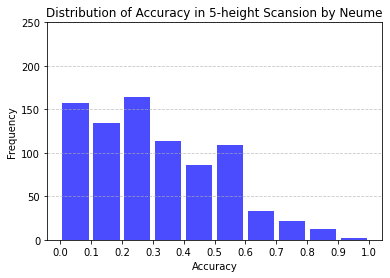

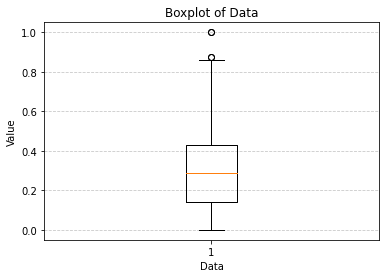

In [209]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your own list of numbers)
data = mean_performance_5

# Define the range and interval for the x-axis
x_min = min(data)
x_max = max(data)
x_interval = 0.1
bins = np.arange(x_min, x_max + x_interval, x_interval)

# Create a histogram
plt.hist(data, bins=bins, color='blue', alpha=0.7, rwidth=0.85)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval))
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.ylim(0,250)
plt.title("Distribution of Accuracy in 5-height Scansion by Neume")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Create a boxplot
plt.boxplot(data)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Boxplot of Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [210]:
sum(mean_performance_5)/len(mean_performance_5)

0.2902557600972262